In [2]:
import numpy as np
from matplotlib import pyplot as plt

#import cosmowap libraries
import cosmo_wap as cw
import cosmo_wap.bk as bk #import terms for the bispectrum
import cosmo_wap.pk as pk #import terms for the powerspectrum

## get cosmology with class

In [3]:
cosmo = cw.utils.get_cosmology(k_max=100) # k_max needs to be 100 for use in compute_bias parts

# So we need to also define survey specific parameters like biases

In [4]:
survey_params = cw.survey_params.SurveyParams(cosmo)

# so we have a bunch of preset surveys 
print("Survey specific params:",survey_params.Euclid.__dict__.keys())

Survey specific params: dict_keys(['b_1', 'z_range', 'be_survey', 'Q_survey', 'n_g', 'f_sky'])


### CosmologicalFunctions takes in the cosmology and a survey_params dict

In [5]:
#so now we can compute terms for this cosmology and for euclid-likes biases
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=True)

Computing bias params...


### functions have this format
- xxx.lx(cosmo_funcs,kk,zz,t=0)


### So now everything is set up - let's plot the monopole

In [18]:
# lets define our triangles:

#so now we set bispectrum as a function of k1,k2,theta and z

zz=1 # redshift

#so lets look at the bispectrum as function of theta for fixed k1 and k2 

k1=0.04
k2=k1/2
theta = np.linspace(0,np.pi,200)
k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta))

#set LOS - this is the natural choice for your theory for the monopole
r=s=1/3

# we can store this set of parameters in a dict
kwargs = {
    'k1': k1,
    'k2': k2,
    'k3': k3,
    'theta': theta,
    'zz': zz,
    'r': r,
    's': s
}

In [19]:
norm = np.abs(bk.NPP.l0(cosmo_funcs,**kwargs).real)

In [15]:
#for monopole 
plt.figure(figsize=(12,8))


#lets plot as fraction of monopole - NPP (Newtonian Plane-Parallel)
norm = np.abs(bk.NPP.l0(**kwargs).real)

#regular newtonian expression
plt.loglog(kk,np.abs(bk.GR2.l0(**kwargs).real)/norm,label='GR2')   # pure GR
plt.loglog(kk,np.abs(bk.WSGR.l0(**kwargs).real)/norm,label='WSGR') #GR/WS mixing
plt.loglog(kk,np.abs(bk.WS.l0(**kwargs).real)/norm,label='WS')     # pure WS

plt.loglog(kk,np.abs(bk.Loc.l0(**kwargs).real)/norm,'--',label='PNG Loc')
plt.loglog(kk,np.abs(bk.Eq.l0(**kwargs).real)/norm,'--',label='PNG Eq')
plt.loglog(kk,np.abs(bk.Orth.l0(**kwargs).real)/norm,'--',label='PNG Orth')
plt.legend()
plt.xlim(0.003,0.13)

plt.ylabel(r'$| P^{\rm term}_0(k)/P^{\rm NPP}_0(k) |$')
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')


TypeError: l0() got an unexpected keyword argument 'cosmo_funcs'

<Figure size 864x576 with 0 Axes>

Computing bias params...


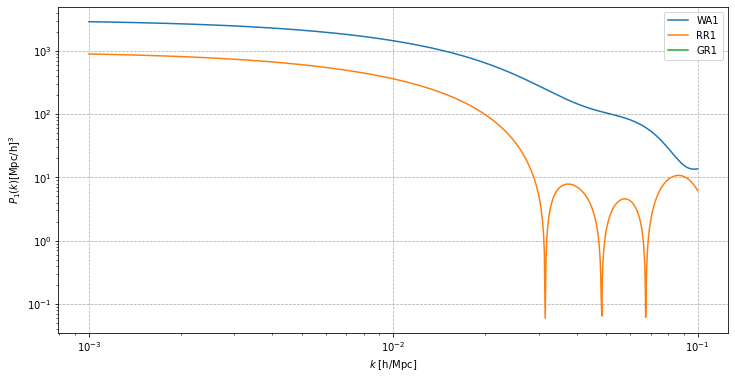

In [38]:
# for dipole
plt.figure(figsize=(12,6))
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=True)

plt.plot(kk,np.abs(pk.WA1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='WA1')
plt.plot(kk,np.abs(pk.RR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='RR1')
plt.plot(kk,np.abs(pk.GR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_1(k) $[Mpc/h$]^3$')
plt.show()

## Or we can consider the multi-tracer case 

In [39]:
# just get a different version of cosmo_funcs with two tracers
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid,survey_params.SKAO2],compute_bias=False)

#note: compute_bias only has valid hmf and HOD for Euclid atm

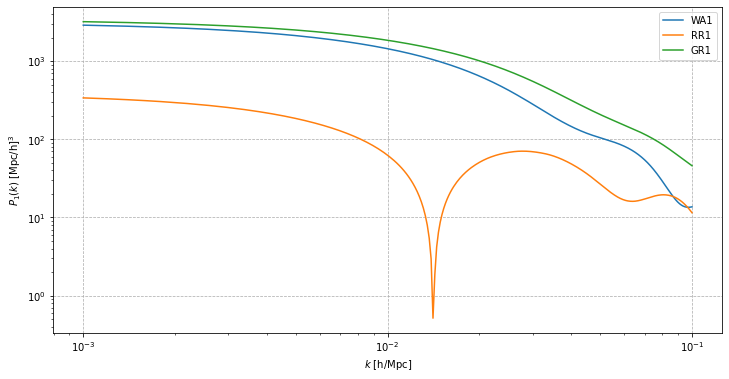

In [36]:
# for dipole - now the GR part does not cancel
plt.figure(figsize=(12,6))

plt.plot(kk,np.abs(pk.WA1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='WA1')
plt.plot(kk,np.abs(pk.RR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='RR1')
plt.plot(kk,np.abs(pk.GR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_1(k) $ [Mpc/h$]^3$')
plt.show()